In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

This is a relatively large output obtained from 500-core run.

In [2]:
ls -lh /n/scratchlfs/ac290r/case1/ParallelDatabase/case1.exo

-rw-rw----+ 1 zhuangjw ac290r 22G Mar 10 15:20 /n/scratchlfs/ac290r/case1/ParallelDatabase/case1.exo


In [3]:
# opening data is fast as only metadata is loaded into memory
ds = xr.open_dataset('/n/scratchlfs/ac290r/case1/ParallelDatabase/case1.exo')

In [4]:
ds

<xarray.Dataset>
Dimensions:            (four: 4, num_dim: 2, num_el_blk: 1, num_el_in_blk1: 2097152, num_elem_var: 2, num_info: 3, num_nod_ns1: 1, num_nod_per_el1: 4, num_nod_var: 4, num_node_sets: 2, num_nodes: 2100225, num_qa_rec: 2, num_side_sets: 4, time_step: 225)
Dimensions without coordinates: four, num_dim, num_el_blk, num_el_in_blk1, num_elem_var, num_info, num_nod_ns1, num_nod_per_el1, num_nod_var, num_node_sets, num_nodes, num_qa_rec, num_side_sets, time_step
Data variables:
    info_records       (num_info) |S81 ...
    qa_records         (num_qa_rec, four) |S33 ...
    time_whole         (time_step) float64 ...
    eb_status          (num_el_blk) int32 ...
    eb_prop1           (num_el_blk) int32 ...
    eb_names           (num_el_blk) |S33 ...
    ns_status          (num_node_sets) int32 ...
    ns_prop1           (num_node_sets) int32 ...
    ns_names           (num_node_sets) |S33 ...
    ss_status          (num_side_sets) int32 ...
    ss_prop1           (num_side_se

In [5]:
ds.nbytes / 1e9 # GB

22.73852811

# Basic variable information

In [6]:
ds['time_step']

<xarray.DataArray 'time_step' (time_step: 225)>
array([  0,   1,   2, ..., 222, 223, 224])
Dimensions without coordinates: time_step

In [7]:
# X/Y coordinate values are stored as 1D arrays, not 2D mesh
ds['coordx']

<xarray.DataArray 'coordx' (num_nodes: 2100225)>
[2100225 values with dtype=float64]
Dimensions without coordinates: num_nodes

In [8]:
ds['coordy']

<xarray.DataArray 'coordy' (num_nodes: 2100225)>
[2100225 values with dtype=float64]
Dimensions without coordinates: num_nodes

In [9]:
# This is the actual variable names for vals_nod_var1, vals_nod_var2, ... 
ds['name_nod_var'] 

<xarray.DataArray 'name_nod_var' (num_nod_var: 4)>
array([b'PRESSURE', b'TEMPERATURE', b'UX', b'UY'], dtype='|S33')
Dimensions without coordinates: num_nod_var

In [10]:
dr_p = ds['vals_nod_var1'].rename('pressure')  # PRESSURE
dr_t = ds['vals_nod_var2'].rename('tempurature')  # TEMPERATURE
dr_ux = ds['vals_nod_var3'].rename('ux') # x velocity
dr_uy = ds['vals_nod_var4'].rename('uy') # y velocity

In [11]:
# The full time series is huge
dr_p.nbytes / 1e9  # GB

3.780405

In [12]:
# A single time step is fine
dr_p[0].nbytes / 1e6  # MB

16.8018

# Plot with 2D data

Scatter plot is terribly slow with this huge data. Must convert to 2D first.

## Check grid structure

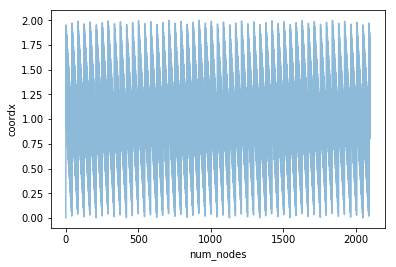

In [13]:
ds['coordx'][::1000].plot(alpha=0.5)

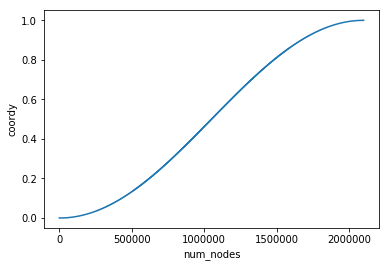

In [14]:
ds['coordy'].plot()

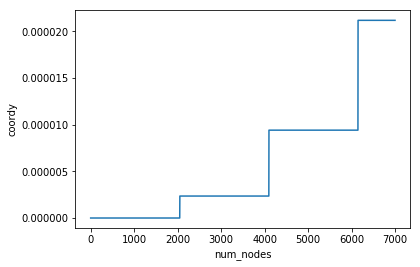

In [15]:
ds['coordy'][:7000].plot()

In [16]:
np.argmax(np.diff(ds['coordy'][:3000])) 

2048

In [17]:
nx = 2049
ny = 1025
nx * ny  # equals to 'num_nodes'

2100225

In [18]:
ds.dims['num_nodes']

2100225

In [19]:
x_1d = ds['coordx'][0:nx]
x_1d

<xarray.DataArray 'coordx' (num_nodes: 2049)>
array([0.000000e+00, 9.765625e-04, 1.953125e-03, ..., 1.998047e+00,
       1.999023e+00, 2.000000e+00])
Dimensions without coordinates: num_nodes

In [20]:
y_1d = ds['coordy'][::nx]
y_1d

<xarray.DataArray 'coordy' (num_nodes: 1025)>
array([0.000000e+00, 2.353095e-06, 9.412359e-06, ..., 9.999906e-01,
       9.999976e-01, 1.000000e+00])
Dimensions without coordinates: num_nodes

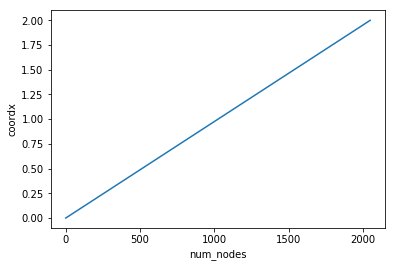

In [21]:
x_1d.plot()

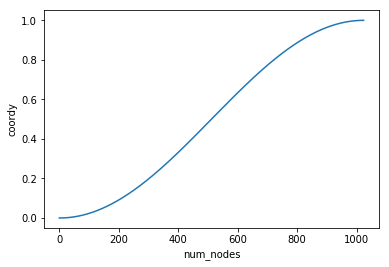

In [22]:
y_1d.plot()

## 1D -> 2D conversion

In [23]:
# don't call .values on the entire array, as it will blow up memory
data_t_2d = dr_t[-1].values.reshape(ny, nx)

Text(0.5,1,'tempurature at last time step')

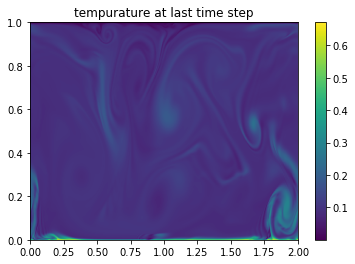

In [24]:
plt.pcolormesh(x_1d, y_1d, data_t_2d)  # consistent with previous scatter plot
plt.colorbar()
plt.title('tempurature at last time step')

In [25]:
# don't call .values on the entire array, as it will blow up memory
data_p_2d = dr_p[-1].values.reshape(ny, nx)

Text(0.5,1,'pressure at last time step')

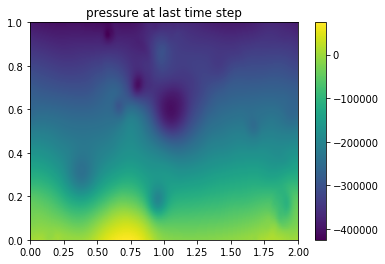

In [26]:
plt.pcolormesh(x_1d, y_1d, data_p_2d)  # consistent with previous scatter plot
plt.colorbar()
plt.title('pressure at last time step')